In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Camera Calibration

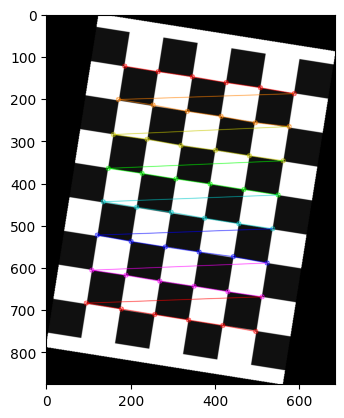

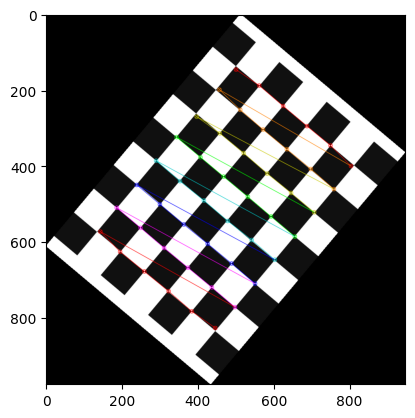

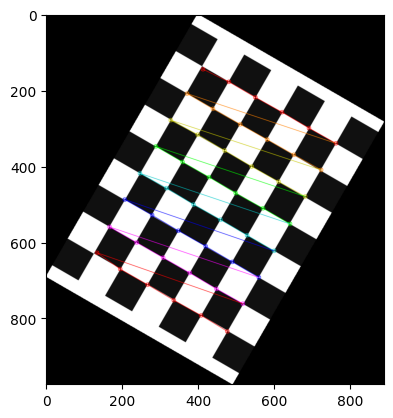

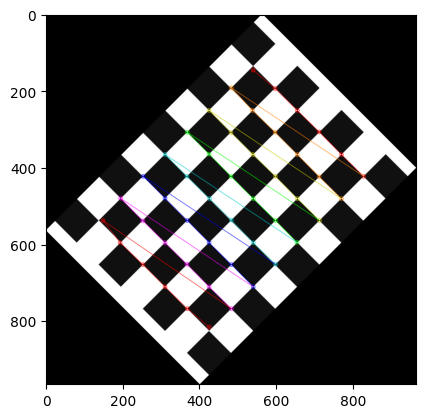

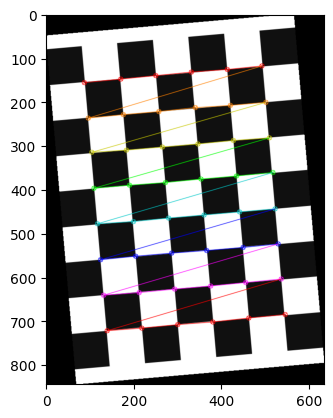

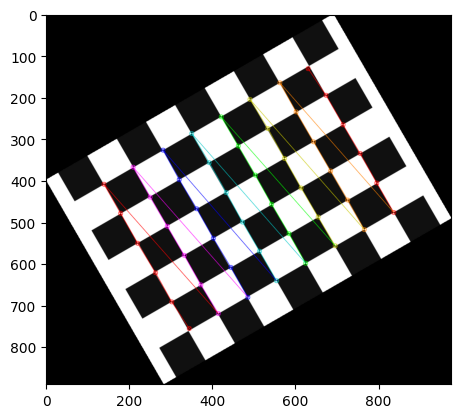

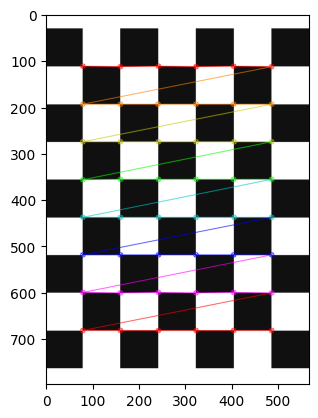

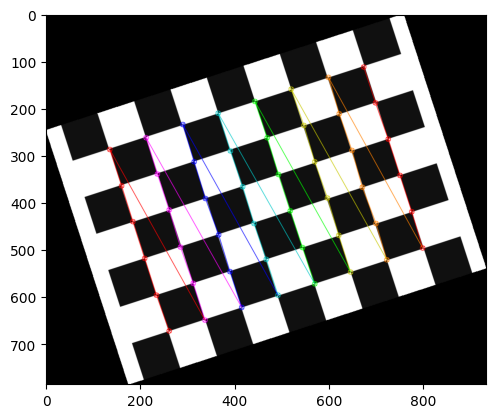

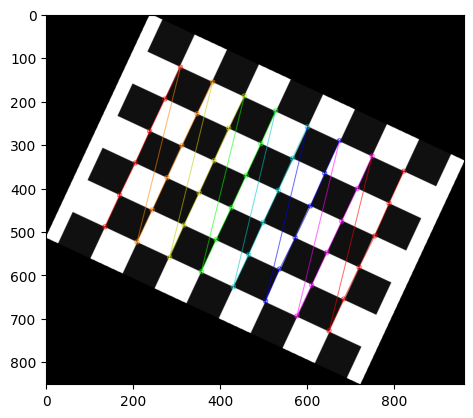

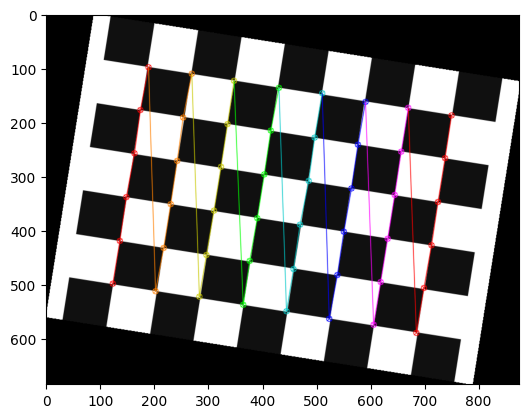

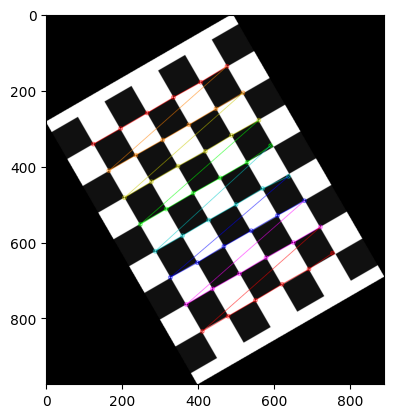

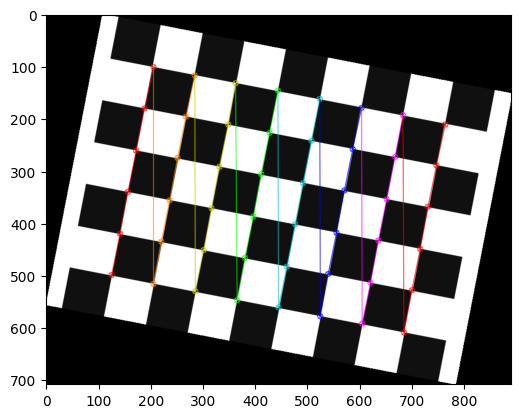

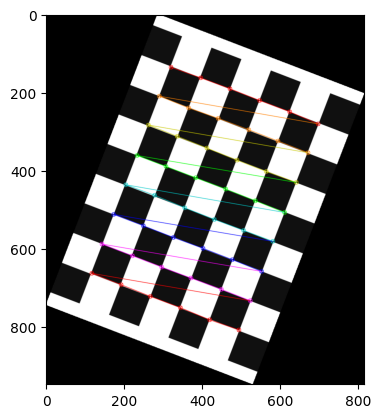

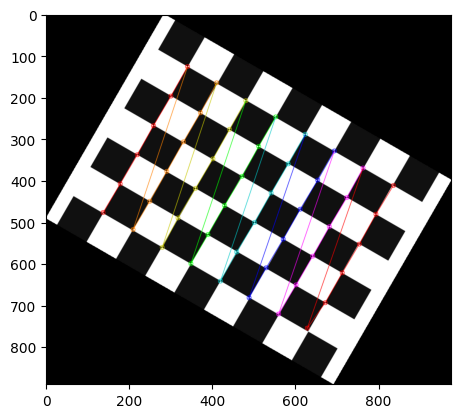

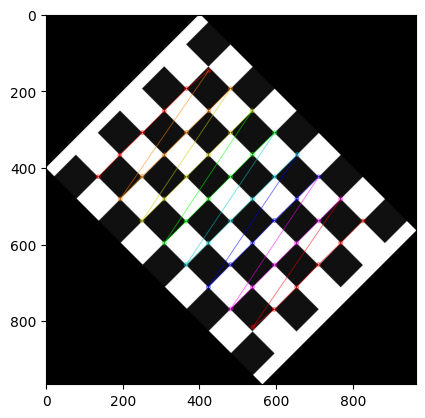

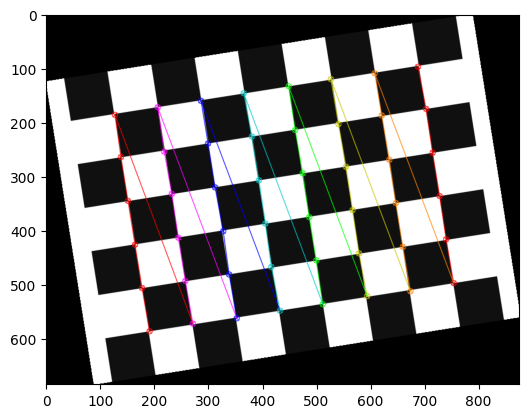

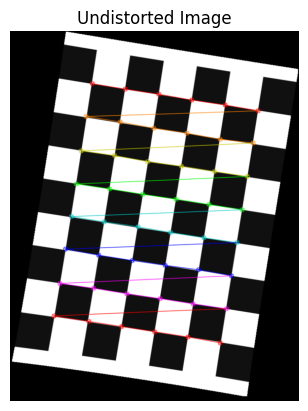

In [10]:
import numpy as np
import cv2
import glob
import os
import matplotlib.pyplot as plt

# Function to find checkerboard corners in images
def find_checkerboard_corners(images, pattern_size=(6, 8)):
    objpoints = []  # 3D points in real world space
    imgpoints = []  # 2D points in image plane

    objp = np.zeros((pattern_size[0] * pattern_size[1], 3), np.float32)
    objp[:, :2] = np.mgrid[0:pattern_size[0], 0:pattern_size[1]].T.reshape(-1, 2)

    for image in images:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        ret, corners = cv2.findChessboardCorners(gray, pattern_size, None)

        if ret:
            imgpoints.append(corners)
            objpoints.append(objp)

            # Optional: visualize the corners found
            cv2.drawChessboardCorners(image, pattern_size, corners, ret)
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.show()

    return objpoints, imgpoints

# Function to calibrate the camera
def calibrate_camera(objpoints, imgpoints, img_shape):
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_shape, None, None)
    return ret, mtx, dist, rvecs, tvecs

# Function to undistort an image
def undistort_image(img, mtx, dist):
    h, w = img.shape[:2]
    new_camera_mtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w, h), 1, (w, h))
    dst = cv2.undistort(img, mtx, dist, None, new_camera_mtx)
    return dst

# path pattern
image_folder = '/content/drive/MyDrive/Hacklab Solutions Private Limited/Question 1/checkerboard images'

# Load images
image_paths = glob.glob(os.path.join(image_folder, '*.png'))
images = [cv2.imread(path) for path in image_paths]

# Find checkerboard corners
objpoints, imgpoints = find_checkerboard_corners(images)

# Calibrate the camera
ret, mtx, dist, rvecs, tvecs = calibrate_camera(objpoints, imgpoints, images[0].shape[:2])

# Example of undistorting an image
undistorted_img = undistort_image(images[0], mtx, dist)

# Visualize the undistorted image
plt.imshow(cv2.cvtColor(undistorted_img, cv2.COLOR_BGR2RGB))
plt.title('Undistorted Image')
plt.axis('off')
plt.show()
